# MLP


## Introduction
In this Jupyter notebook, we will explore MLP,a modern feedforward artificial neural network, consisting of fully connected neurons with a nonlinear kind of activation function, organized in at least three layers, notable for being able to distinguish data that is not linearly separable.

## Dataset 
We will use two crucial datasets: 'mnist_train.csv' and 'mnist_test.csv'.

The 'mnist_train.csv' file contains 60,000 training examples along with their corresponding labels, while the 'mnist_test.csv' file includes 10,000 test examples, each consisting of 785 values.The first value in each row is the label, which ranges from 0 to 9, and the remaining 784 values represent the pixel values, which range from 0 to 255.

In [1]:
#install necessary package
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

Epoch 1, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 2, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 3, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 4, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 5, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 6, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 7, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 8, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 9, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 10, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 11, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 12, Accuracy: 0.1027, Training Cost: 0.0900
Epoch 13, Accuracy: 0.1027, Training Cost: 0.0899
Epoch 14, Accuracy: 0.1027, Training Cost: 0.0899
Epoch 15, Accuracy: 0.1027, Training Cost: 0.0899
Epoch 16, Accuracy: 0.1299, Training Cost: 0.0897
Epoch 17, Accuracy: 0.2523, Training Cost: 0.0888
Epoch 18, Accuracy: 0.2635, Training Cost: 0.0830
Epoch 19, Accuracy: 0.3174, Training Cost: 0.0775
Epoch 20, Accuracy: 0.3606, Training Cost: 0.0745
Epoch 21,

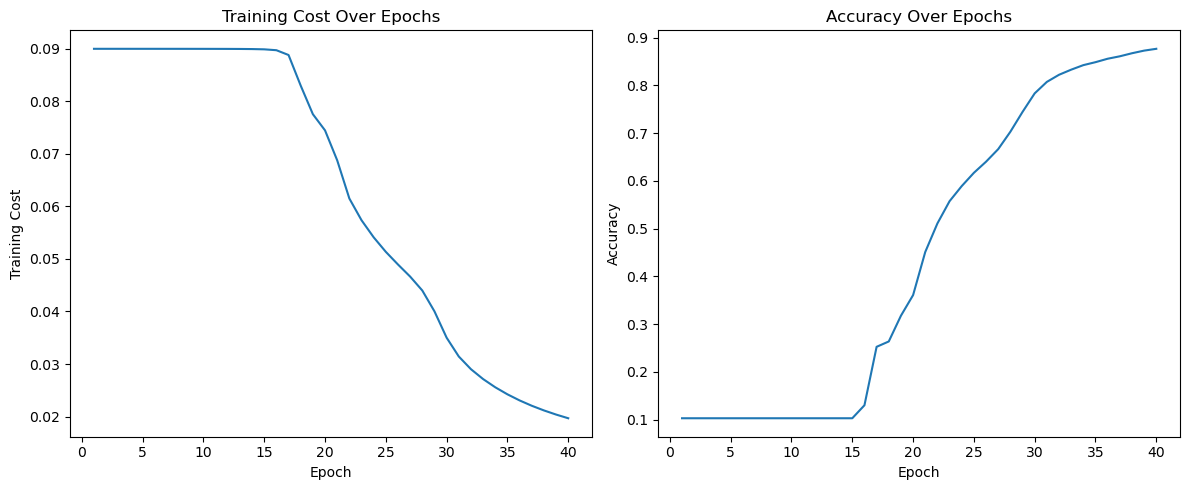

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the dataset
def load_data():
    train_data = pd.read_csv('mnist_train.csv')
    test_data = pd.read_csv('mnist_test.csv')

    X_train = train_data.iloc[:, 1:].values / 255.0  # Normalize
    y_train = to_categorical(train_data.iloc[:, 0].values, num_classes=10)
    X_test = test_data.iloc[:, 1:].values / 255.0  # Normalize
    y_test = to_categorical(test_data.iloc[:, 0].values, num_classes=10)

    return X_train, y_train, X_test, y_test


# Define other functions (sigmoid, softmax, initialize_parameters, forward_prop, backward_prop) as they are
# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Softmax function for the output layer
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1, keepdims=True)


# Initialize weights and biases
def initialize_parameters(input_size, hidden1_size, hidden2_size, output_size):
    W1 = np.random.randn(input_size, hidden1_size) * 0.01
    b1 = np.zeros(hidden1_size)
    W2 = np.random.randn(hidden1_size, hidden2_size) * 0.01
    b2 = np.zeros(hidden2_size)
    W3 = np.random.randn(hidden2_size, output_size) * 0.01
    b3 = np.zeros(output_size)
    return W1, b1, W2, b2, W3, b3

# Forward propagation
def forward_prop(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

# Backward propagation
def backward_prop(X, y, Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, b1, b2, b3, learning_rate):
    m = y.shape[0]
    dZ3 = A3 - y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    dZ2 = np.dot(dZ3, W3.T) * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1.reshape(b1.shape)
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2.reshape(b2.shape)
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3.reshape(b3.shape)

    return W1, b1, W2, b2, W3, b3


def train_mlp(X_train, y_train, X_test, y_test, epochs, learning_rate, batch_size):
    input_size = 784  # MNIST images are 28x28 pixels
    hidden1_size = 128
    hidden2_size = 64
    output_size = 10

    W1, b1, W2, b2, W3, b3 = initialize_parameters(input_size, hidden1_size, hidden2_size, output_size)

    training_costs = []  # List to store training costs
    accuracies = []      # List to store accuracies

    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            Z1, A1, Z2, A2, Z3, A3 = forward_prop(X_batch, W1, b1, W2, b2, W3, b3)
            W1, b1, W2, b2, W3, b3 = backward_prop(X_batch, y_batch, Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, b1, b2, b3, learning_rate)

        # Calculate training cost (MSE)
        _, _, _, _, _, A3_train = forward_prop(X_train, W1, b1, W2, b2, W3, b3)
        training_cost = np.mean(np.square(y_train - A3_train))
        training_costs.append(training_cost)

        # Calculate accuracy on test set
        _, _, _, _, _, A3_test = forward_prop(X_test, W1, b1, W2, b2, W3, b3)
        accuracy = np.mean(np.argmax(A3_test, axis=1) == np.argmax(y_test, axis=1))
        accuracies.append(accuracy)

        print(f"Epoch {epoch + 1}, Accuracy: {accuracy:.4f}, Training Cost: {training_cost:.4f}")

    return W1, b1, W2, b2, W3, b3, training_costs, accuracies

# Main execution
X_train, y_train, X_test, y_test = load_data()
epochs = 40
learning_rate = 0.01
batch_size = 32
W1, b1, W2, b2, W3, b3, training_costs, accuracies = train_mlp(X_train, y_train, X_test, y_test, epochs, learning_rate, batch_size)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training cost
axs[0].plot(range(1, epochs + 1), training_costs)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Training Cost')
axs[0].set_title('Training Cost Over Epochs')

# Plot accuracy
axs[1].plot(range(1, epochs + 1), accuracies)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy Over Epochs')

plt.tight_layout()
plt.show()

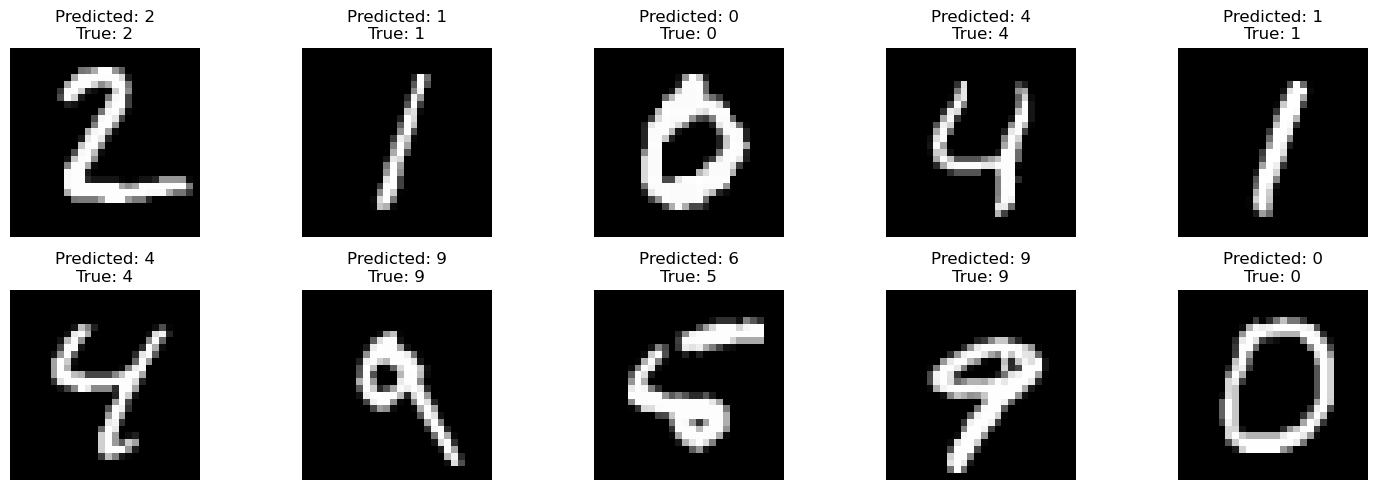

In [2]:
import matplotlib.pyplot as plt

def predict(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(X, W1, b1, W2, b2, W3, b3)
    return np.argmax(A3, axis=1)

# Plot first 10 test images with their predicted and true labels
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predict(X_test[i].reshape(1, -1), W1, b1, W2, b2, W3, b3)[0]}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

And we also want to plot first 10 test images with their predicted and true labels, it seems that our preditive model is doing a wonderful job.

## Conclusion

In this project, we developed a Multilayer Perceptron (MLP) to classify handwritten digits from the MNIST dataset. Initially, the model's performance was static with an accuracy of around 10.27%, indicating random guessing.

However, from the 16th epoch onwards, the model showed significant improvement, reaching an accuracy of 87.65% by the 40th epoch.

The steady decrease in training cost from roughly 0.0900 to 0.0195 also indicated effective learning. These results demonstrate the MLP's ability to learn complex patterns in data, highlighting the potential of further optimization and advanced techniques to enhance performance.